# Demonstration of signal dilatation

This notebook explores the signal dilatation feature.

### Notebook setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data
from solardatatools.algorithms import dilation

### Load data table

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generation data set. 

In [3]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key="DEMO_KEY")

[============================================================] 100.0% ...queries complete in 3.3 seconds       



### Run the DataHandler pipeline

In [4]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col="ac_power")
dh.report()


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:14<00:00,  2.08s/it]



total time: 14.54 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.14s
Cleaning                   0.11s
Filtering/Summarizing      12.29s
    Data quality           0.08s
    Clear day detect       0.15s
    Clipping detect        2.10s
    Capacity change detect 9.95s


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


### Dilation with default configuration

In [5]:
dil = dilation.Dilation(dh)

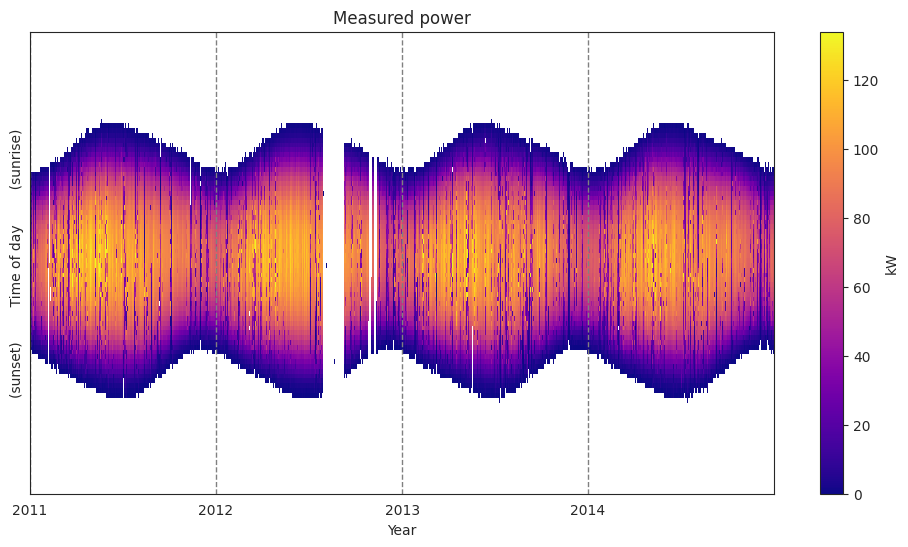

In [6]:
dil.plot_heatmap(space="original");

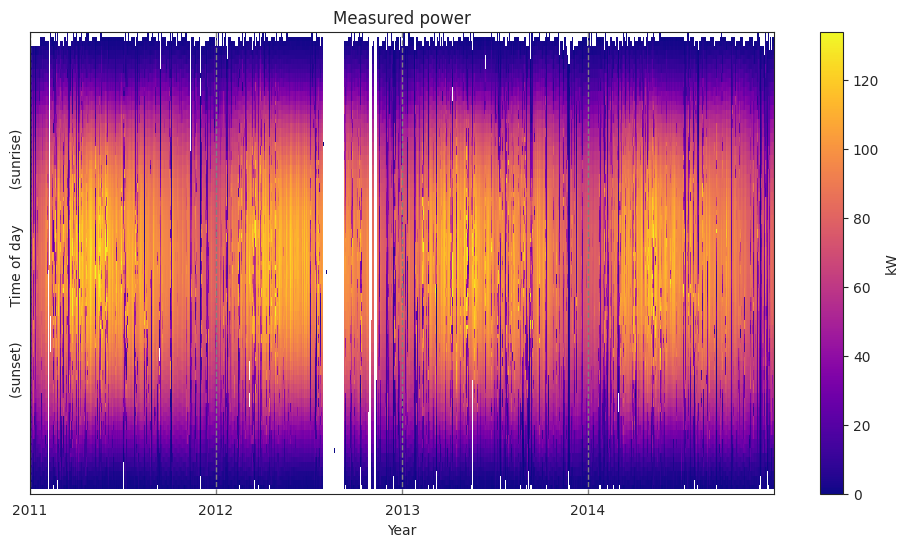

In [7]:
dil.plot_heatmap(space="dilated");

### Dilation with custom settings

In [17]:
config = {"nvals_dil": 21, "matrix": "filled"}
dil = dilation.Dilation(dh, **config)

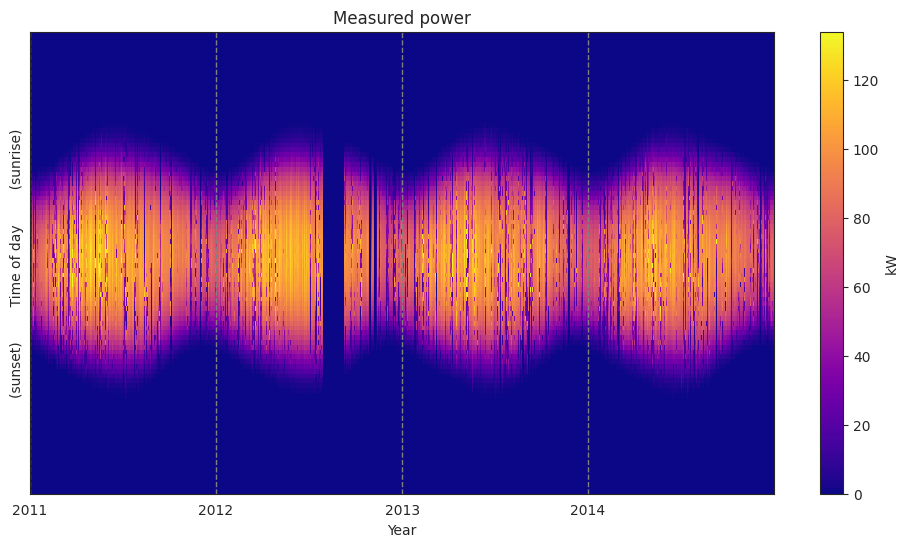

In [18]:
dil.plot_heatmap(space="original");

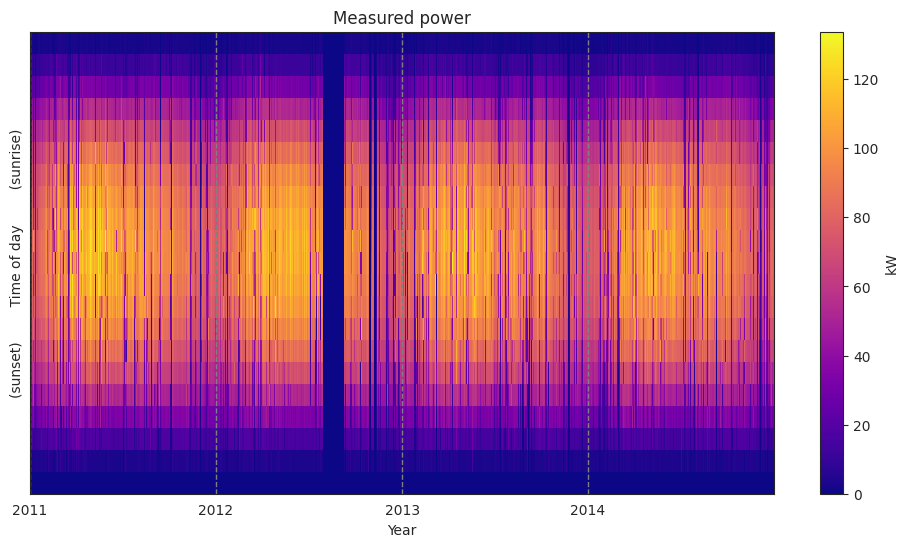

In [19]:
dil.plot_heatmap(space="dilated");